<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 6
## Ejercicio integrador de exámen
### Jorge Andres Niño


## Consigna

Resolver los puntos mostrados en el siguiente documento:

In [1]:
from IPython.display import IFrame, display
IFrame("./Ejercicio integrador teoria moderna_TS6.pdf", width=1000, height=1000)

A continuación se presenta la solución obtenida:

In [1]:
from IPython.display import IFrame, display
IFrame("./TS6_res.pdf", width=1000, height=1000)

### Respuesta en frecuencia, fase y diagrama de polos y ceros.

A continuación vamos a simular en python la función transferencia obtenida, para los parametros pedidos, y luego verificaremos con LTSPICE, lo obtenido en la simulación numerica

In [1]:
# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_bicuad_omegayq, pretty_print_lti, tf2sos_analog, pretty_print_SOS

from scipy import signal as Funcion
import numpy as np
import matplotlib.pyplot as plt
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt


<IPython.core.display.Math object>

<IPython.core.display.Math object>

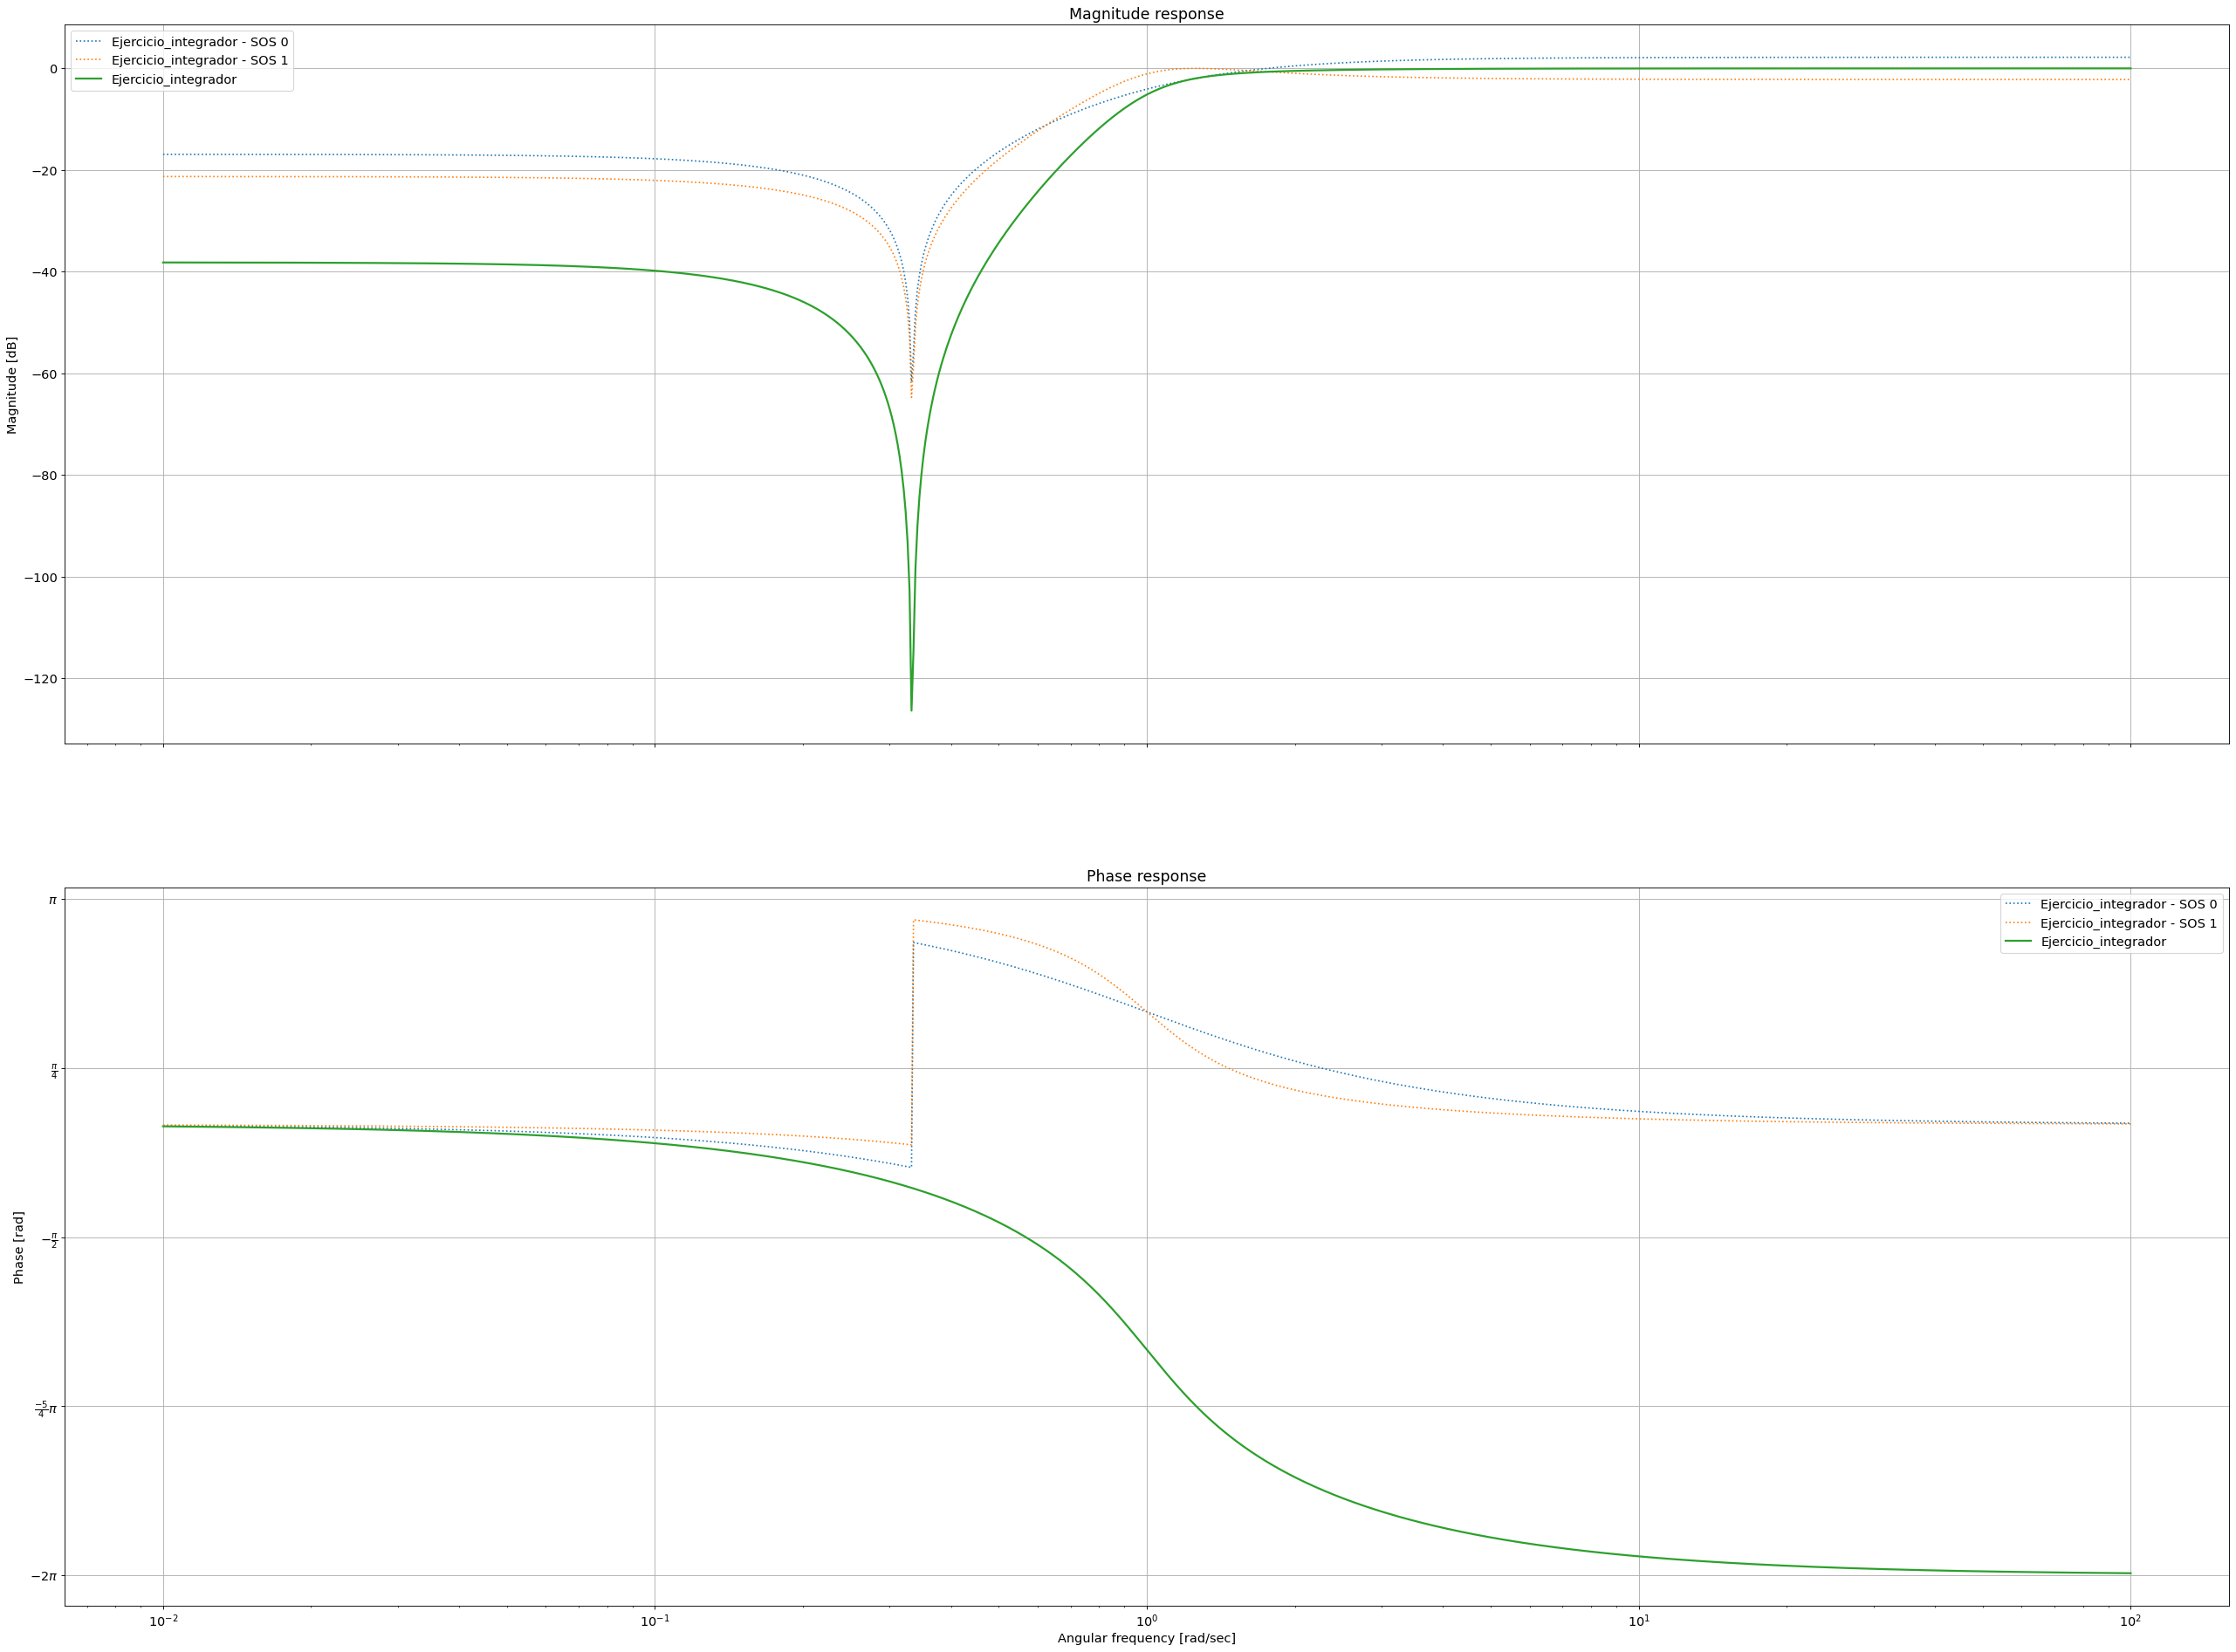

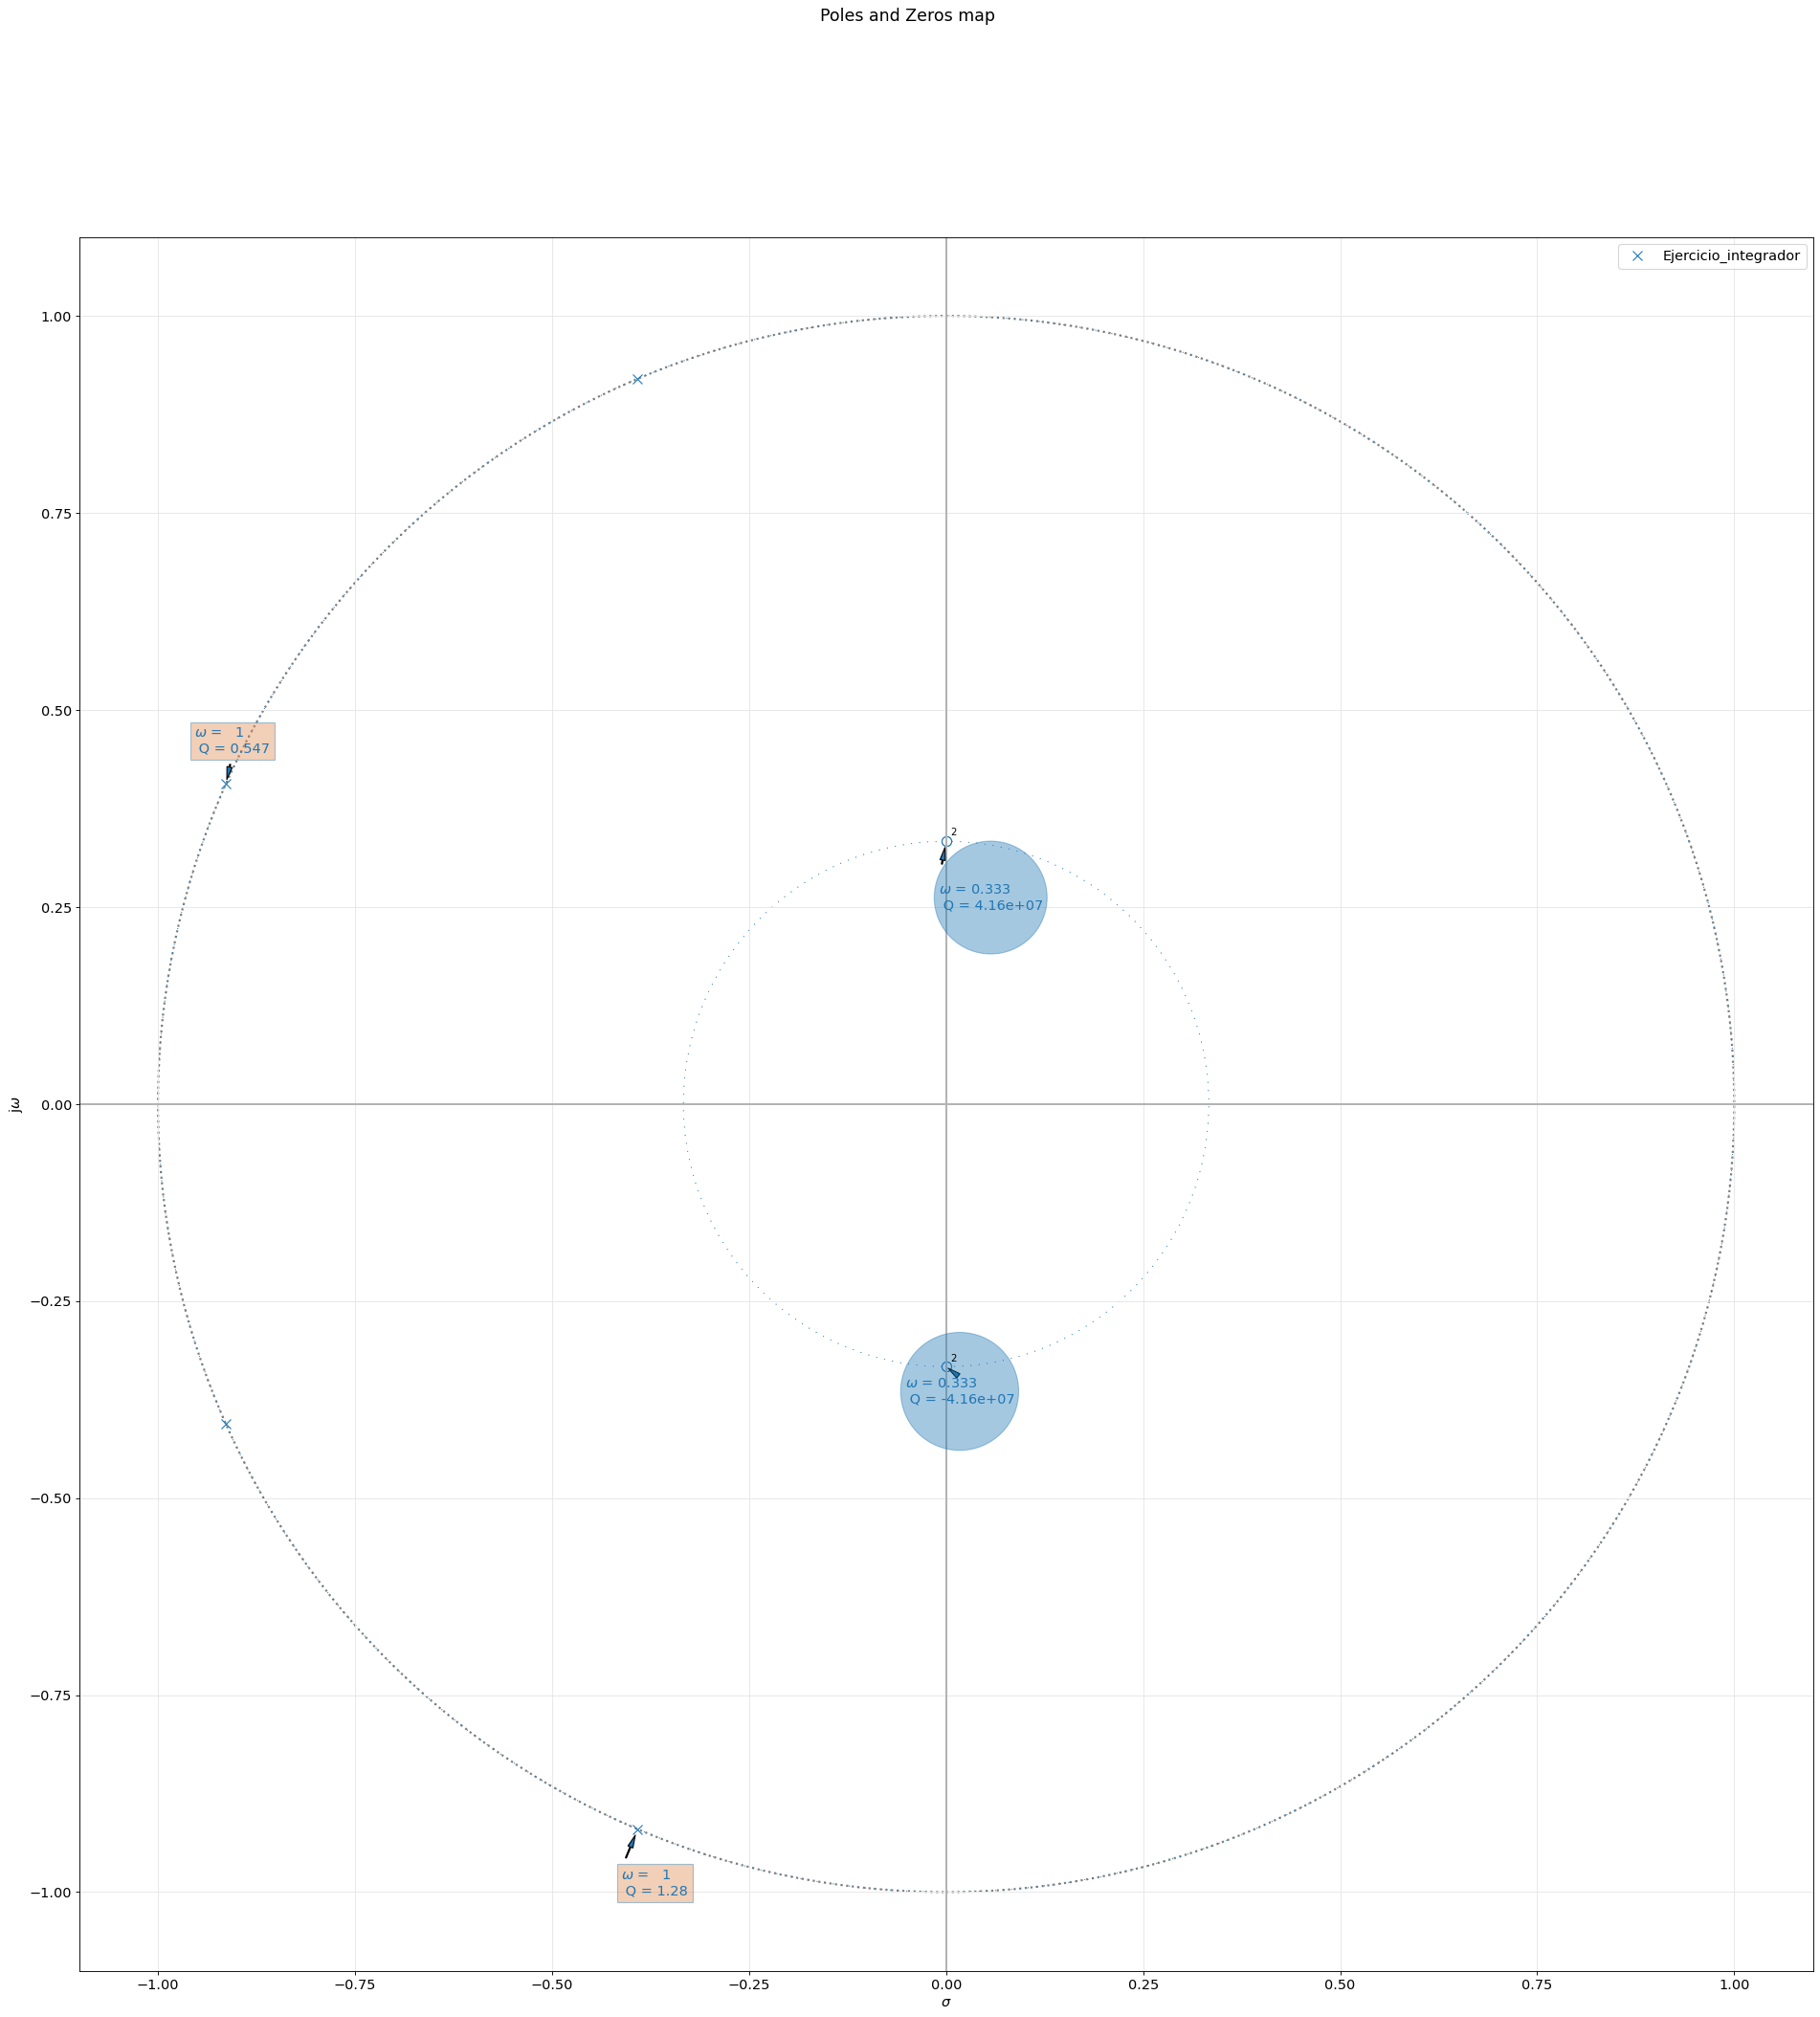

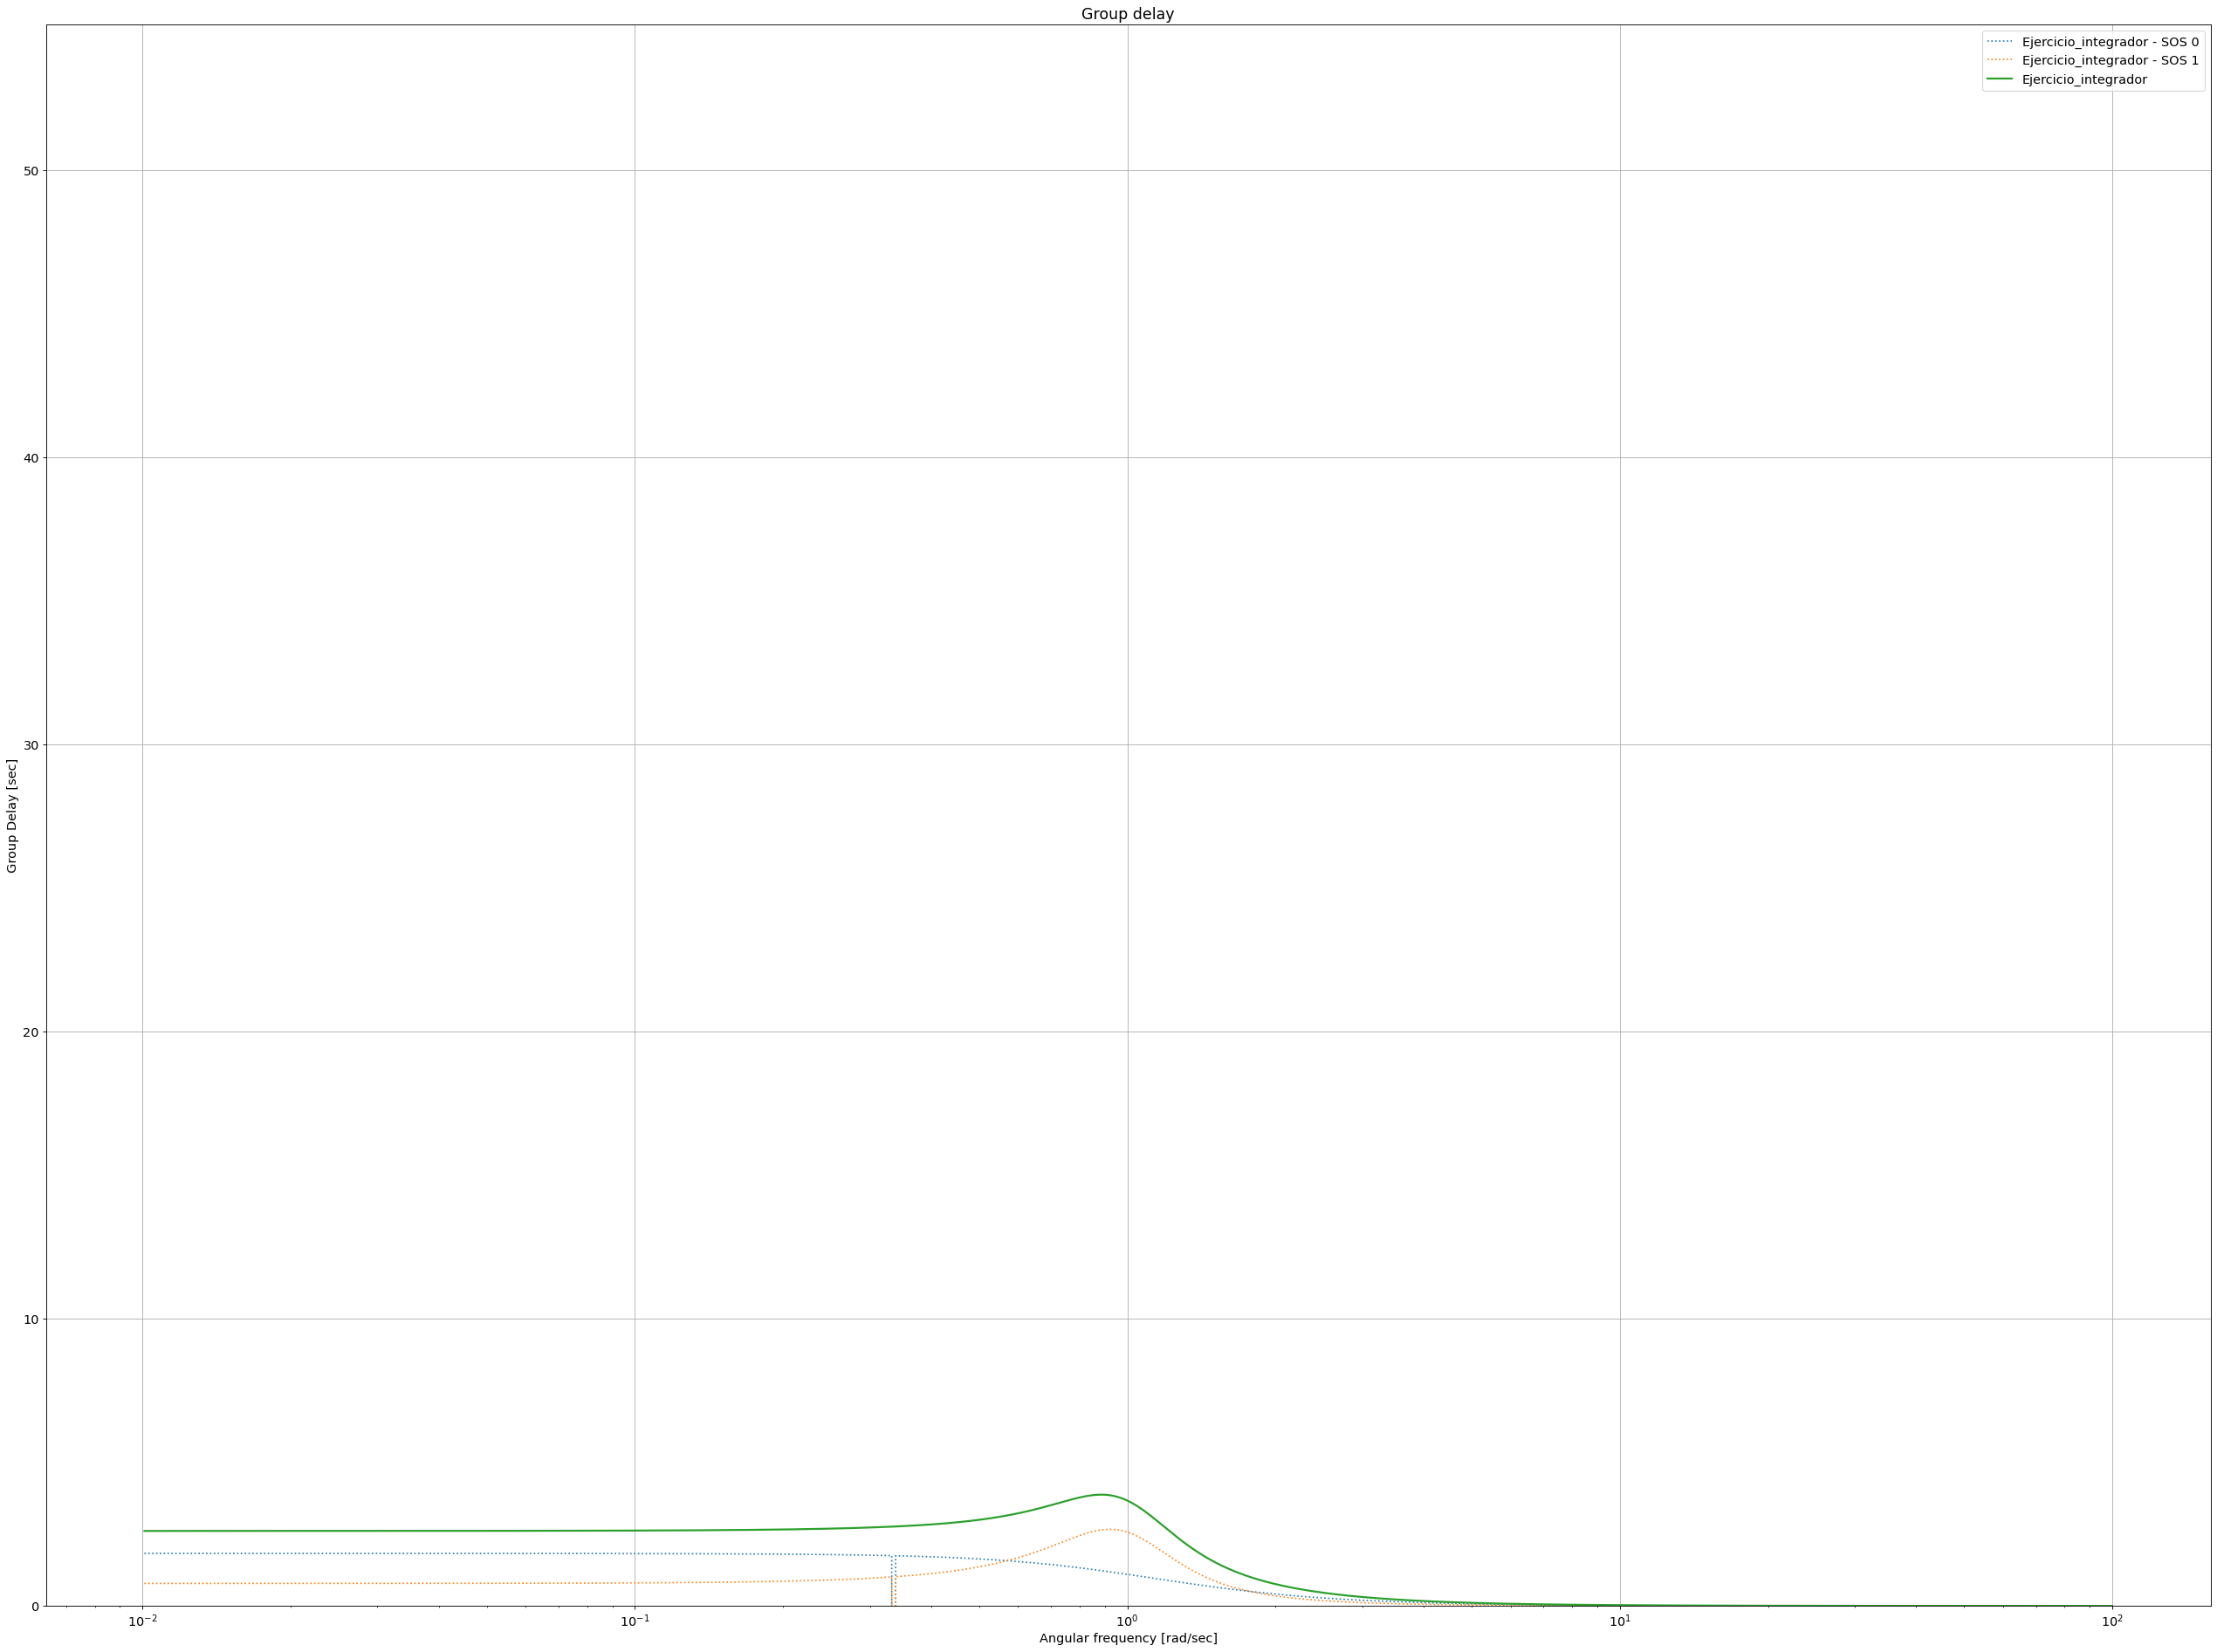

In [5]:
#%% Funcion trasnferencia:
w0 = 1
wn = 1/3
num1= np.array([w0**4,0,2*w0**2*wn**2,0,wn**4])
den1 = np.array([w0**4,2.61*w0**3,3.43*w0**2, 2.61*w0, 1])
H1 = Funcion.TransferFunction( num1, den1 )
pretty_print_lti(num1, den1)
fig_sz_x = 40
fig_sz_y = 30
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

# particiono en SOS's para la implementación
sos_hp = tf2sos_analog(num1, den1)
pretty_print_SOS(sos_hp)
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.
analyze_sys(sos_hp, 'Ejercicio_integrador')

Probamos una primera aproximación en LTSPICE normalizado con bicuadráticas, empleando levantamiento d,e admitancias, como señala Schaumann en el capitulo 5.2, seteando una $f_c = 1KHz$, y por tanto la frecuencia del cero de transmisión en $f_z=333Hz$:

![*Figura 6*](CIR_SC.png)

![*Figura 7*](SIM_SC_1.png)

Aquí podemos observar que aunque la atenuación de banda de paso es aproximadamente $3 db$ encontramos una leve atenuación en las altas frecuencias que no deberia ocurrir.

Podemos ahora implementarlo colocando los ceros de transmisión de la siguiente manera normalizados:

![*Figura 7*](CIR_PAR.png)

![*Figura 7*](SIM_PAR.png)

## Implementación mediante circuito Bicuad

A continuación podemos emplear la estructura bicuad mencionada en el planteo del problema, para sintetizar cada una de las funciones SOS de tal manera que cascadeandolas obtengamos la misma respuesta que en el caso anterior. Podemos ver el análisis de la respuesta a continuación:

In [1]:
from IPython.display import IFrame, display
IFrame("./TS6_gic_res.pdf", width=1000, height=1000)

Situamos nuestra $f_0=1Hz$ de tal manera de poder normalizar nuestro circuito y a partir de las relaciones obtenidas y los polinomios de la sección de calculo, calculamos los valores de $R0,RQ0,RN0$ para la primer etapa de segundo orden y la $R1,RQ1,RN1$ para la segunda etapa SOS. Los valores obtenidos se acercaron bastante a la plantilla, sin embargo se hizo necesario ajustar los valores finales, no así las relaciones entre $RN,RQ$ de cada etapa que determinan las $\omega_N$, $\omega_0$ y $Q$

![*Figura 9*](LTCIRGIC.png)

![*Figura 9*](LTSIMGIC.png)

# Conclusiones:
 

* Se pudo sintetizar una función bicuadratica tipo pasa-altos notch a partir de dos métodos, uno mediante levantamiento parcial de impedancias o "voltage feedforward" y mediante un circuito activo particular cuya respuesta ajusta a esta bicuadrática pedida en particular.
* El ajuste de la bicuadratica activa fue un poco mas laborioso, ya que al no ser una bicudratica genérica como el GIC propuesto por Schaumann, no se pudo partir de la función transferencia sino que se tuvo que partir de las condiciones impuestas por el circuito pedido.